In [258]:
import json as json
import pathlib as pl
from datetime import datetime
from os import path

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from numpy import array
from numpy.linalg import norm

gain = 1.5
rcParams[ 'figure.figsize' ] = [ gain * 6.4, gain * 4.8 / 2 ]

In [259]:
for v in pl.Path( "./plots" ).glob( '*' ):
	if datetime.fromtimestamp( path.getctime( v ) ).date() >= datetime.fromisocalendar( 2024, 37, 2 ).date():
		print( str( v ).split( '_' )[ -1 ], end = '\t' )
		print( datetime.fromtimestamp( path.getctime( v ) ), end = '\t' )
		try:
			record = pd.read_csv( f'{v}/logs.txt', sep = '\t' ).shape[ 0 ]
			with open( f'{v}/config.json' ) as f:
				conf = json.load( f )
		except:
			print( 'unable to read' )
		planned = array( conf[ 'target_trajectory' ] ).shape[ 0 ] // 2
		print( f'{record=}\t{planned=}\t{record == planned}' )

1724851485	2024-09-12 22:05:01.437115	record=399	planned=12	False
1725264976	2024-09-12 22:05:01.853236	record=299	planned=300	False
1725268112	2024-09-12 22:05:01.928170	record=299	planned=300	False
1725274451	2024-09-12 22:05:02.010784	record=299	planned=300	False
1725278516	2024-09-12 22:05:02.088836	record=299	planned=300	False
1725525073	2024-09-12 22:05:02.166874	record=599	planned=600	False
1725534896	2024-09-12 22:05:02.353150	record=599	planned=600	False
1726033948	2024-09-11 07:52:28.967991	record=2000	planned=2000	True
1726033954	2024-09-12 22:05:02.508750	record=2000	planned=2000	True
1726033959	2024-09-12 22:05:02.522252	record=2000	planned=2000	True
1726151643	2024-09-12 16:34:03.025139	record=2000	planned=2000	True
1726153404	2024-09-12 17:03:24.524985	record=2000	planned=2000	True
1726157070	2024-09-12 18:04:30.478803	record=2000	planned=2000	True
1726240678	2024-09-13 17:17:58.406534	record=53	planned=2000	False
1726240752	2024-09-13 17:19:12.269375	unable to read
reco

In [260]:
folder = pl.Path( './plots/three_robots_chain_with_fixed_end_1726242029' )
data = pd.read_csv( f'{folder}/logs.txt', sep = '\t' )
with open( f'{folder}/config.json' ) as f:
	conf = json.load( f )
data[ 'time' ] = [ i * conf[ 'time_step' ] for i in data.index ]

In [261]:
def disp( d: dict, prefix: str = '' ):
	for k, v in d.items():

		if isinstance( v, dict ):
			print( prefix + k + ':' )
			disp( v, prefix + '\t' )
			continue

		if isinstance( v, list ):
			if len( v ) > 0 and isinstance( v[ 0 ], dict ):
				print( prefix + k + ':' )
				disp( { str( i ): e for i, e in enumerate( v ) }, prefix + '\t' )
				continue

			l = array( v ).shape
			print( prefix + k + ':', v if sum( l ) < 10 else l )
			continue

		print( prefix + k + ':', v )


disp( conf )

model_dynamics: three_robots_chain_with_fixed_end
time_step: 0.01
kwargs:
	weight: [0.0, 0.0, 112.81500000000001]
	buoyancy: [0.0, 0.0, -120.0]
	center_of_mass: [0.0, 0.0, 0.0]
	center_of_volume: [0.0, 0.0, -0.02]
	inverted_inertial_matrix: (6, 6)
	hydrodynamic_matrix: (6, 6)
state: (48,)
actuation: (18,)
record: True
previous_states: (1, 48)
previous_actuations: (1, 18)
model: None
horizon: 25
target_trajectory: (4000, 1, 24)
objective: three_robot_chain_objective
time_steps_per_actuation: 25
guess_from_last_solution: True
tolerance: 0.0001
max_iter: 1000
bounds:
	lb: (18,)
	ub: (18,)
	keep_feasible: (18,)
constraints:
	0:
		fun: constraint_f
		lb: (300,)
		ub: (300,)
		finite_diff_rel_step: None
		finite_diff_jac_sparsity: None
		jac: 2-point
		hess: None
		keep_feasible: False
result_shape: [1, 1, 18]
raw_result: None
result: (1, 1, 18)
pose_weight_matrix: (25, 24, 24)
actuation_derivative_weight_matrix: (1, 18, 18)
objective_weight: 10.0
final_weight: 10.0
predicted_trajectories: [

In [262]:
conf[ 'constraints' ][ 0 ][ 'ub' ][ :len(conf[ 'constraints' ][ 0 ][ 'ub' ]) // 25 ]

[3.00001, 3.00001, 3.00001, 2.8, 2.8, 2.8, 2.8, 2.8, 2.8, 3.0, 3.0, 3.0]

In [263]:
conf[ 'constraints' ][ 0 ][ ('lb') ][ :len(conf[ 'constraints' ][ 0 ][ 'ub' ]) // 25 ]

[-inf, -inf, -inf, 0.4, 0.4, 0.4, -inf, -inf, -inf, -inf, -inf, -inf]

In [264]:
data.tail( 10 )

,index,sim_time,step_time,success,C01,C12,C23,D01,D12,D23,...,speed_r0,speed_r1,speed_r2,speed_r3,actuation_r0,actuation_r1,actuation_r2,objective,Unnamed: 25,time
724,724,1433.890950,2.782760,True,0.642756,0.549192,13.559287,1.391870,0.982041,0.260606,...,"[-0.5716169425044229, -0.01701663042002186, -1.0489108891409673, 0.0035601930598567174, 0.02321452581893377, -0.009455191060915977]","[-0.7855228163105371, -0.4607398190933747, 0.04951060553908944, -0.004950915268149629, 0.004201303061167683, -0.0004475080671072724]","[-0.6986866273671375, -0.35137733658030046, -0.20953370339302158, 0.0032045054298257495, -0.00673497712733806, 0.004350949372096]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[13.924779483820721, -11.706256107643037, 17.704834993298768, -0.004325542585312862, 0.0038657160634307172, -0.0017054245580005718]","[-7.826331553442593, -0.2715917725810595, 129.15845877942309, -0.0038830704091243865, 0.007298663231352802, 0.0027407601527276817]","[-43.05297098043621, 23.065070293542092, 122.93289855563616, 0.0009935500304841085, -0.004519864299196607, -0.007892815412219659]",8.315390,NaN,7.24
725,725,1440.601437,6.690663,True,0.644549,0.547298,13.520534,1.396743,0.979649,0.261189,...,"[-0.5751491428830059, -0.01538681666782428, -1.0438324077749515, 0.0030354965167745957, 0.023388314230226498, -0.009558850642766781]","[-0.7776838609605243, -0.45084617265467847, 0.14338934103475603, -0.005220068675157803, 0.00484346321080949, -0.00027768724802967144]","[-0.7212138347699854, -0.3250153012534332, -0.11505286494777553, 0.0033245373666838606, -0.007186316593714499, 0.0038621659284393418]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-1.7552093010687493, 1.9871670912729638, 18.445457313055517, -0.004583583190833594, 0.002454989062182627, -0.000993064495502549]","[12.173668446557368, 14.21413944504552, 114.64611172600354, -0.0034875667281252707, 0.006952037092011688, 0.002742519275305196]","[-23.052970980436296, 32.41741949016823, 116.67882248391882, 0.0008314960782584856, -0.004143659937066256, -0.008108006608373068]",6.651078,NaN,7.25
726,726,1446.050134,5.429248,True,0.646103,0.545677,13.466895,1.402094,0.977360,0.261955,...,"[-0.5783870805246292, -0.01449352581510695, -1.0387359977441089, 0.0024998929205875572, 0.02344345404626874, -0.00962455633467105]","[-0.7659316322136522, -0.4267786403219109, 0.22134996155629577, -0.005476077302302761, 0.005461191536721026, -0.00011251799329091254]","[-0.7263987607040928, -0.2904437982247028, -0.026137011620253447, 0.0034256160243325913, -0.007609836564598804, 0.0033531584500604296]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-1.404845377116338, 1.1325344105994488, 18.439720863381158, -0.0046483108647666065, 0.0011098978612682114, -0.00037987350314713103]","[16.63411349535778, 30.408153783363936, 95.89518511177782, -0.0033841010198219098, 0.006633181128331756, 0.0026563694745865745]","[-3.052970980436296, 41.669066012769655, 109.8040819661367, 0.0006003221491298573, -0.003840269566016581, -0.00839666899779984]",6.148314,NaN,7.26
727,727,1446.447856,0.378368,True,0.647386,0.544195,13.399962,1.407862,0.975211,0.262887,...,"[-0.5813297168753498, -0.01434070110556505, -1.0336215753579157, 0.001954043553823124, 0.023378084747694844, -0.009651521860640859]","[-0.7502523495799427, -0.3884603377798119, 0.28332059471160775, -0.005699605385038784, 0.006048539168371487, 5.093126482948003e-05]","[-0.7141805516172194, -0.2476183138250867, 0.057188723811668285, 0.003512014910505508, -0.007997329344474093, 0.0028327309838623587]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[-1.054479058749593, 0.27792178026910375, 18.43398723459436, -0.00471462599175078, -0.00025526409574660775, 0.00024321363312599167]","[21.094563547434795, 46.602166437996914, 77.14424710821352, -0.002978932510490523, 0.006235864723344359, 0.0026173478368462367]","[16.947029019563704, 50.92070931268526, 102.92933040720229, 0.00044112654639526174, -0.0034179308497276823, -0.008543358871298163]",5.820795,NaN,7.27
728,728,1446.971826,0.503322,True,0.648370,0.542715,13.321

In [265]:
state_r0 = data[ 'state_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
state_r1 = data[ 'state_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
state_r2 = data[ 'state_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)

speed_r0 = data[ 'speed_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r0[ 'l_norm' ] = norm( speed_r0[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r0[ 'a_norm' ] = norm( speed_r0[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

speed_r1 = data[ 'speed_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r1[ 'l_norm' ] = norm( speed_r1[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r1[ 'a_norm' ] = norm( speed_r1[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

speed_r2 = data[ 'speed_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
speed_r2[ 'l_norm' ] = norm( speed_r2[ [ 'x', 'y', 'z' ] ], axis = 1 )
speed_r2[ 'a_norm' ] = norm( speed_r2[ [ 'phi', 'theta', 'psi' ] ], axis = 1 )

actuation_r0 = data[ 'actuation_r0' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r1 = data[ 'actuation_r1' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)
actuation_r2 = data[ 'actuation_r2' ].apply(
		lambda x: pd.Series( [ float( v ) for v in x[ 1:-1 ].split( ',' ) ], [ 'x', 'y', 'z', 'phi', 'theta', 'psi' ] )
		)

n_frames = len( conf[ 'target_trajectory' ] )
traj = array( conf[ 'target_trajectory' ] )[ :n_frames // 2, :, : ]

# Errors

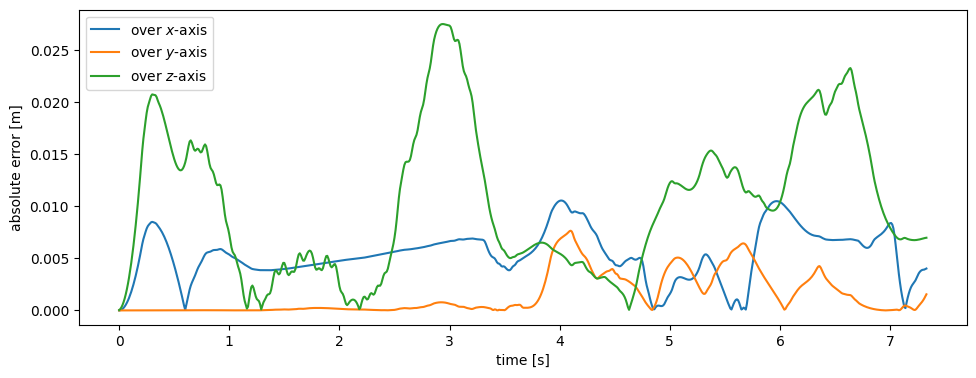

In [266]:
plt.plot( data[ 'time' ], abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] ) )
plt.legend( [ 'over $x$-axis', 'over $y$-axis', 'over $z$-axis' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'absolute error [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/error.png', dpi = 300 )

In [267]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).describe()

,x,y,z
count,7.340000e+02,7.340000e+02,734.000000
mean,5.325927e-03,1.461400e-03,0.010291
std,2.381576e-03,1.973285e-03,0.007024
min,7.628425e-09,7.040716e-16,0.000031
25%,4.013752e-03,4.726934e-05,0.004555
50%,5.227227e-03,3.169323e-04,0.009444
75%,6.800979e-03,2.641891e-03,0.015169
max,1.054421e-02,7.646567e-03,0.027484


array([[<Axes: title={'center': 'x'}>, <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: >]], dtype=object)

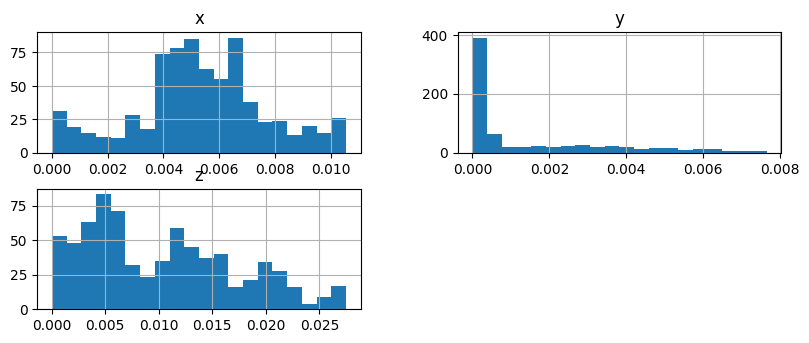

In [268]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).hist( bins = 20 )

<Axes: >

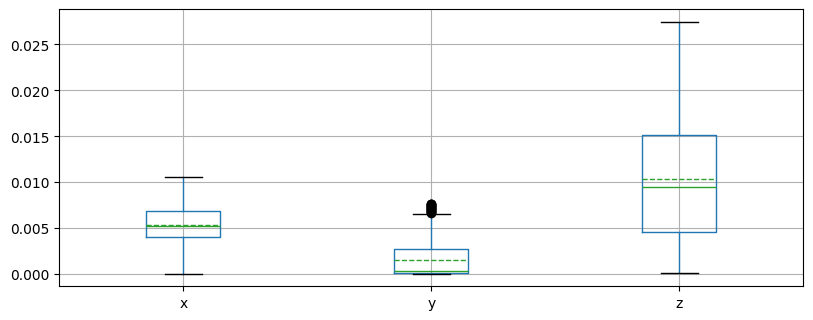

In [269]:
(abs( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ] )).boxplot( meanline = True, showmeans = True )

In [270]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).describe()

,0
count,734.000000
mean,0.012450
std,0.006346
min,0.000031
25%,0.006907
50%,0.012573
75%,0.016022
max,0.028253


array([[<Axes: title={'center': '0'}>]], dtype=object)

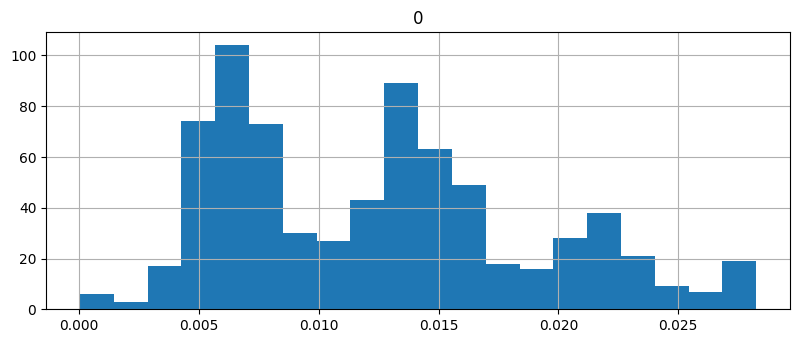

In [271]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).hist( bins = 20 )

<Axes: >

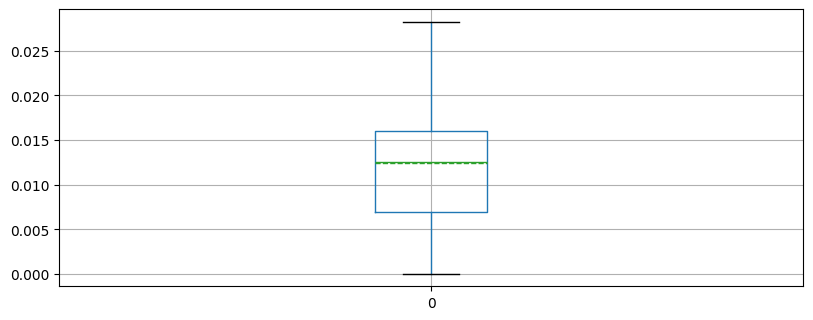

In [272]:
pd.DataFrame( norm( traj[ :data.shape[ 0 ], 0, :3 ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) ).boxplot(
		meanline = True,
		showmeans = True
		)

# Constraints

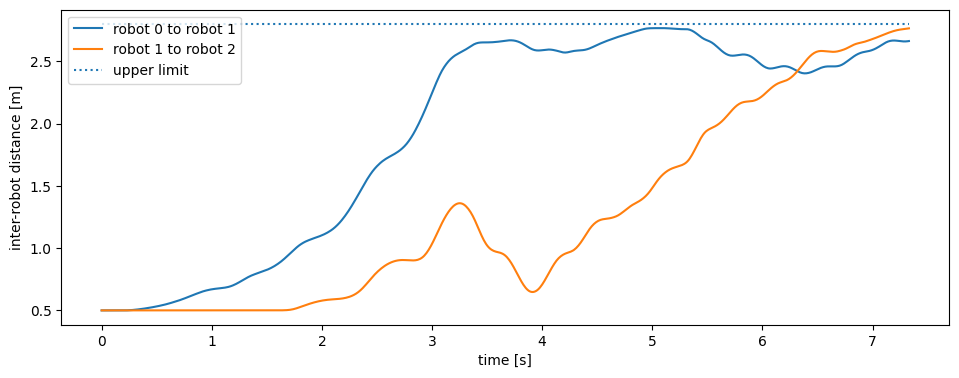

In [273]:
plt.plot( data[ 'time' ], norm( state_r1[ [ 'x', 'y', 'z' ] ] - state_r0[ [ 'x', 'y', 'z' ] ], axis = 1 ) )
plt.plot( data[ 'time' ], norm( state_r2[ [ 'x', 'y', 'z' ] ] - state_r1[ [ 'x', 'y', 'z' ] ], axis = 1 ) )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 4 ], 0, data[ 'time' ].max(), linestyles = ':' )
plt.legend( [ 'robot 0 to robot 1', 'robot 1 to robot 2', 'upper limit' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'inter-robot distance [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/inter_robot_distance.png', dpi = 300 )

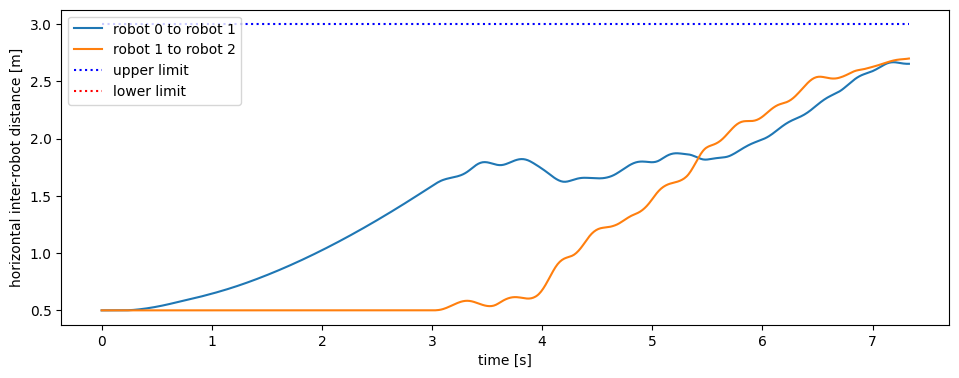

In [274]:
plt.plot( data[ 'time' ], norm( state_r1[ [ 'x', 'y' ] ] - state_r0[ [ 'x', 'y' ] ], axis = 1 ) )
plt.plot( data[ 'time' ], norm( state_r2[ [ 'x', 'y' ] ] - state_r1[ [ 'x', 'y' ] ], axis = 1 ) )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 2 ], 0, data[ 'time' ].max(), linestyles = ':', color = 'b' )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'lb' ][ 2 ], 0, data[ 'time' ].max(), linestyles = ':', color = 'r' )
plt.legend( [ 'robot 0 to robot 1', 'robot 1 to robot 2', 'upper limit', 'lower limit' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( 'horizontal inter-robot distance [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/horizontal_inter_robot_distance.png', dpi = 300 )

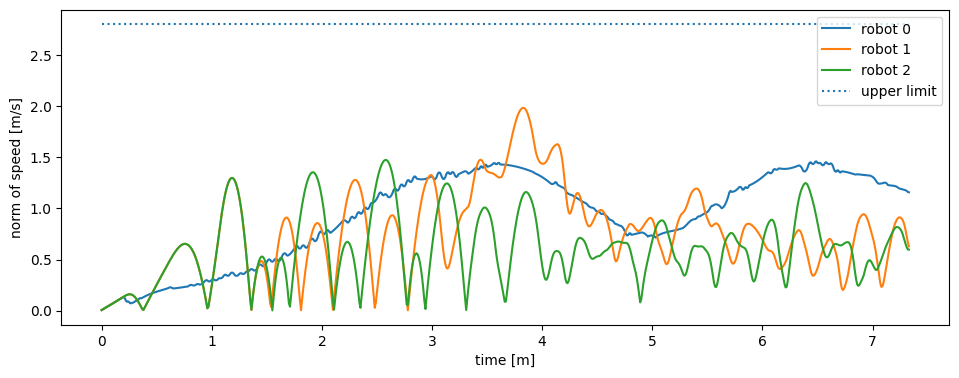

In [275]:
plt.plot( data[ 'time' ], speed_r0[ 'l_norm' ] )
plt.plot( data[ 'time' ], speed_r1[ 'l_norm' ] )
plt.plot( data[ 'time' ], speed_r2[ 'l_norm' ] )
plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 6 ], 0, data[ 'time' ].max(), linestyles = ':' )
plt.legend( [ 'robot 0', 'robot 1', 'robot 2', 'upper limit' ] )
plt.xlabel( 'time [m]' )
plt.ylabel( 'norm of speed [m/s]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/robots_speed.png', dpi = 300 )

# States

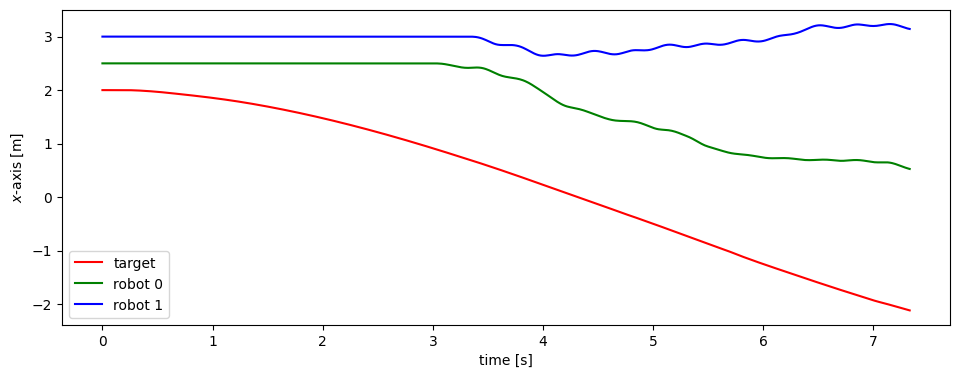

In [276]:
try:
	plt.plot( data[ 'time' ], traj[ :, 0, 0 ], ':', color = 'r', linewidth = 3 )
except:
	pass
plt.plot( data[ 'time' ], state_r0[ 'x' ], 'r' )
plt.plot( data[ 'time' ], state_r1[ 'x' ], 'g' )
plt.plot( data[ 'time' ], state_r2[ 'x' ], 'b' )

plt.legend( [ 'target', 'robot 0', 'robot 1', 'robot 2' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( '$x$-axis [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/pose_x.png', dpi = 300 )

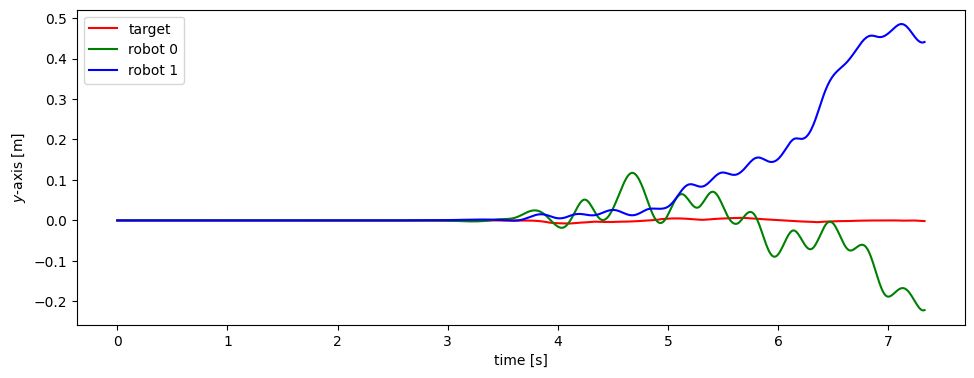

In [277]:
try:
	plt.plot( data[ 'time' ], traj[ :, 0, 1 ], ':', color = 'r', linewidth = 3 )
except:
	pass
plt.plot( data[ 'time' ], state_r0[ 'y' ], 'r' )
plt.plot( data[ 'time' ], state_r1[ 'y' ], 'g' )
plt.plot( data[ 'time' ], state_r2[ 'y' ], 'b' )

plt.legend( [ 'target', 'robot 0', 'robot 1', 'robot 2' ] )
plt.xlabel( 'time [s]' )
plt.ylabel( '$y$-axis [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/pose_y.png', dpi = 300 )

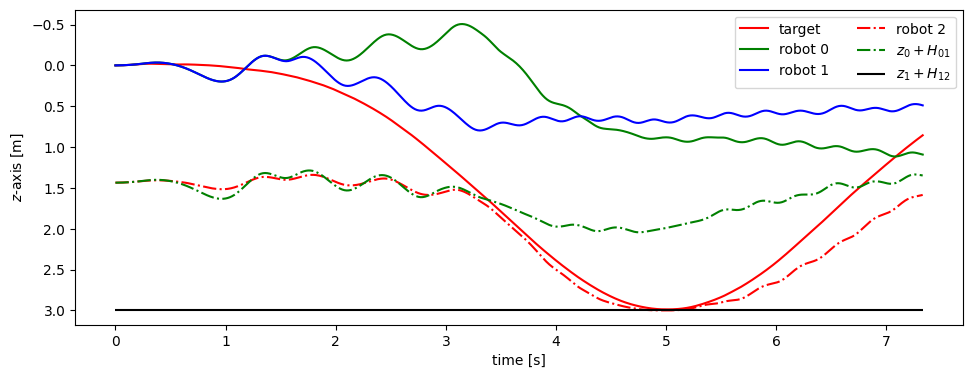

In [278]:
try:
	plt.plot( data[ 'time' ], traj[ :, 0, 2 ], ':', color = 'r', linewidth = 3 )
except:
	pass
plt.plot( data[ 'time' ], state_r0[ 'z' ], 'r' )
plt.plot( data[ 'time' ], state_r1[ 'z' ], 'g' )
plt.plot( data[ 'time' ], state_r2[ 'z' ], 'b' )
plt.plot( data[ 'time' ], data[ 'H01' ] + state_r0[ 'z' ], '-.', color = 'r' )
plt.plot( data[ 'time' ], data[ 'H12' ] + state_r1[ 'z' ], '-.', color = 'g' )

plt.hlines( conf[ 'constraints' ][ 0 ][ 'ub' ][ 0 ], 0, data[ 'time' ].max(), 'k' )
plt.legend(
		[ 'target', 'robot 0', 'robot 1', 'robot 2', '$z_0 + H_{01}$', '$z_1 + H_{12}$', 'floor constraint' ],
		ncol = 2
		)
plt.gca().invert_yaxis()
plt.xlabel( 'time [s]' )
plt.ylabel( '$z$-axis [m]' )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/pose_z.png', dpi = 300 )

# Speeds

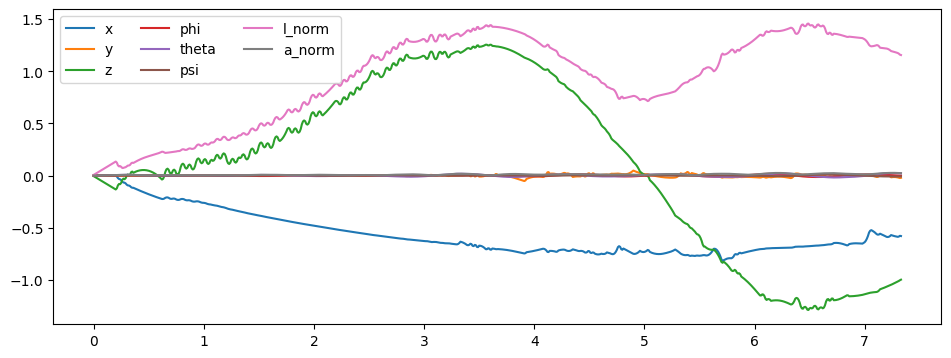

In [279]:
plt.plot( data[ 'time' ], speed_r0 )
plt.legend( speed_r0.columns, ncol = 3 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/speed_r0.png', dpi = 300 )

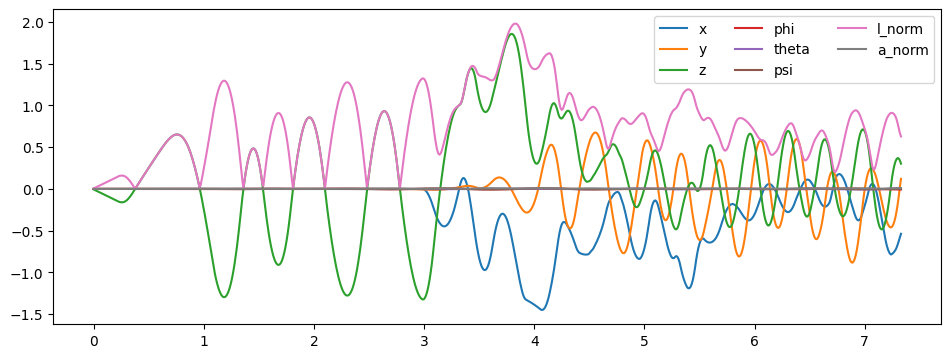

In [280]:
plt.plot( data[ 'time' ], speed_r1 )
plt.legend( speed_r1.columns, ncol = 3 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/speed_r1.png', dpi = 300 )

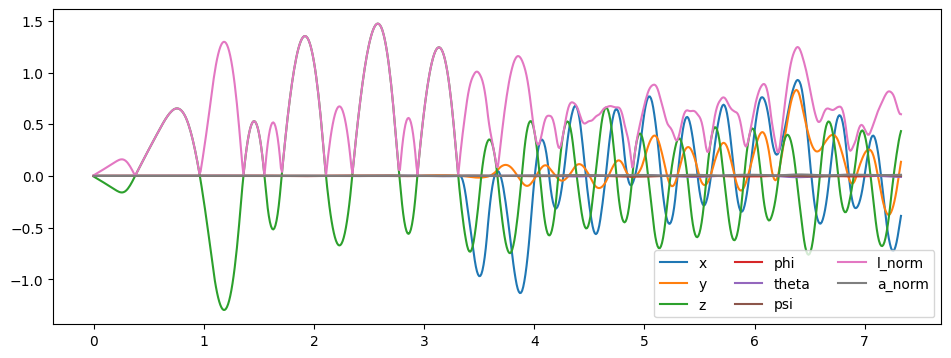

In [281]:
plt.plot( data[ 'time' ], speed_r2 )
plt.legend( speed_r2.columns, ncol = 3 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/speed_r2.png', dpi = 300 )

# Actuations

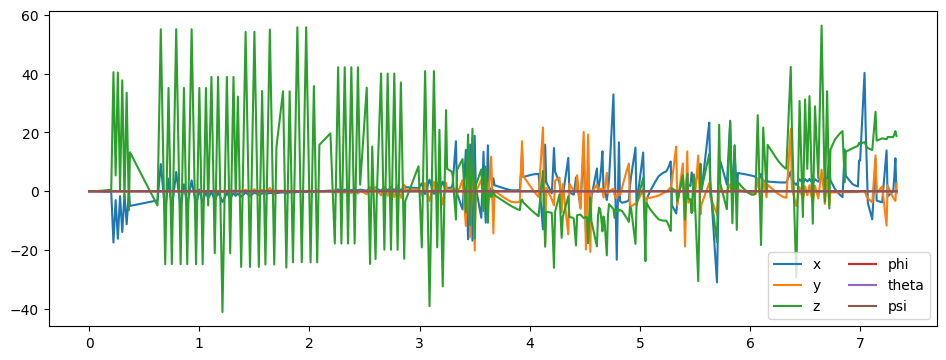

In [282]:
plt.plot( data[ 'time' ], actuation_r0 )
plt.legend( actuation_r0.columns, ncol = 2 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/actuation_r0.png', dpi = 300 )

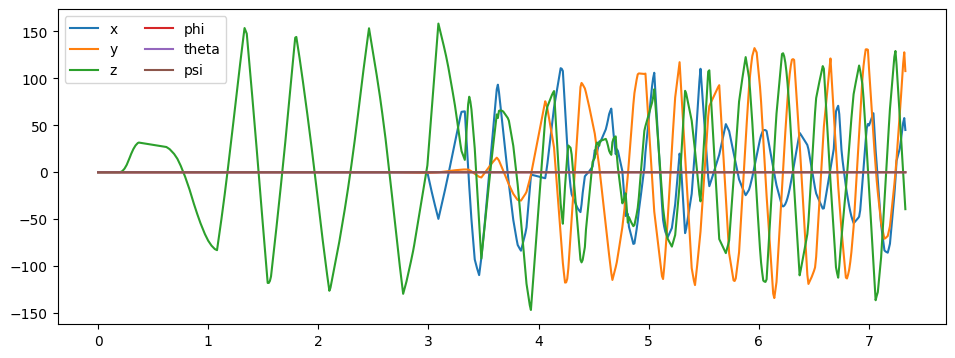

In [283]:
plt.plot( data[ 'time' ], actuation_r1 )
plt.legend( actuation_r1.columns, ncol = 2 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/actuation_r1.png', dpi = 300 )

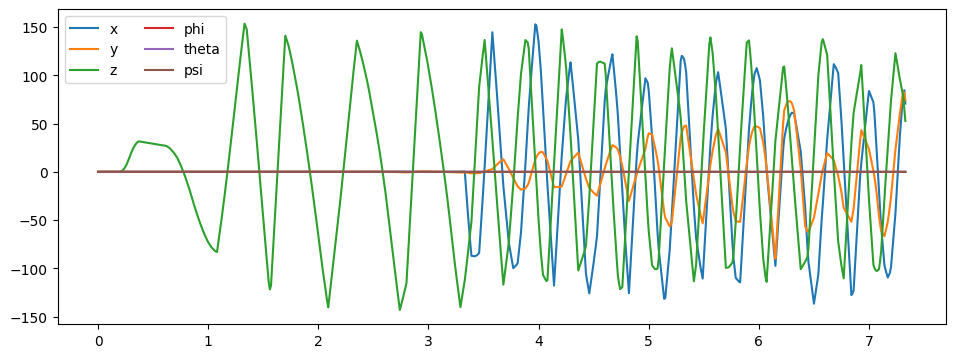

In [284]:
plt.plot( data[ 'time' ], actuation_r2 )
plt.legend( actuation_r2.columns, ncol = 2 )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/actuation_r2.png', dpi = 300 )

# Time

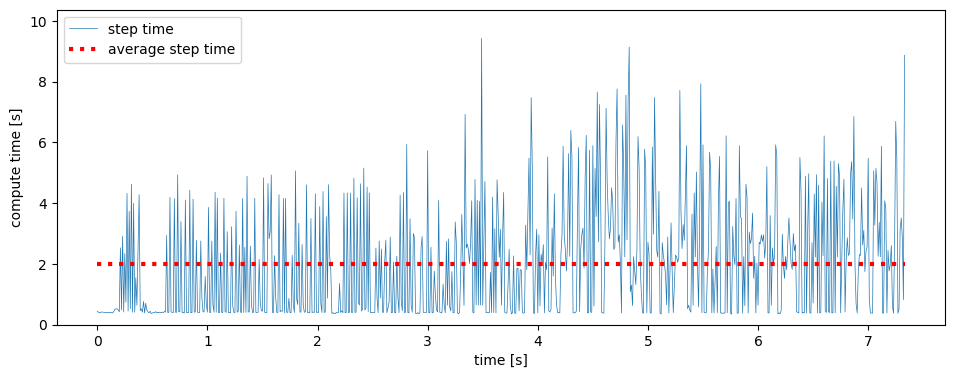

In [285]:
plt.plot( data[ 'time' ], data[ 'step_time' ], linewidth = .5 )
plt.hlines( data.step_time.mean(), 0, data[ 'time' ].max(), linestyles = ':', color = 'r', linewidth = 3 )
plt.ylabel( 'compute time [s]' )
plt.xlabel( 'time [s]' )
plt.gca().set_ylim( 0, data.step_time.max() * 1.1 )
plt.legend( [ 'step time', 'average step time' ] )
plt.subplots_adjust( bottom = 0.125, top = 1, left = 0.075, right = 1 )
plt.savefig( f'{folder}/compute_time.png', dpi = 300 )

In [286]:
data[ 'step_time' ].describe()

count    734.000000
mean       1.987196
std        1.896248
min        0.348299
25%        0.404051
50%        0.894000
75%        3.042675
max        9.421622
Name: step_time, dtype: float64

<Axes: >

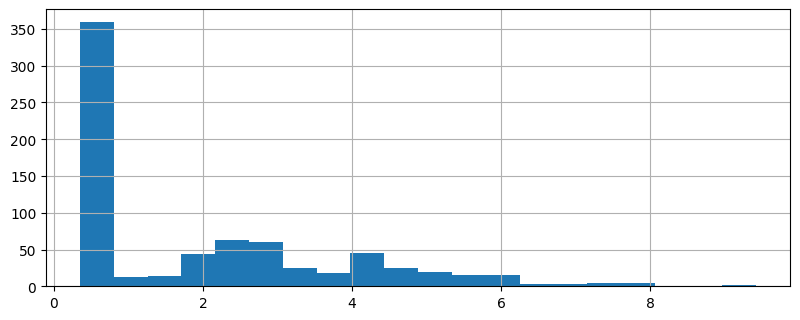

In [287]:
data[ 'step_time' ].hist( bins = 20 )

<Axes: >

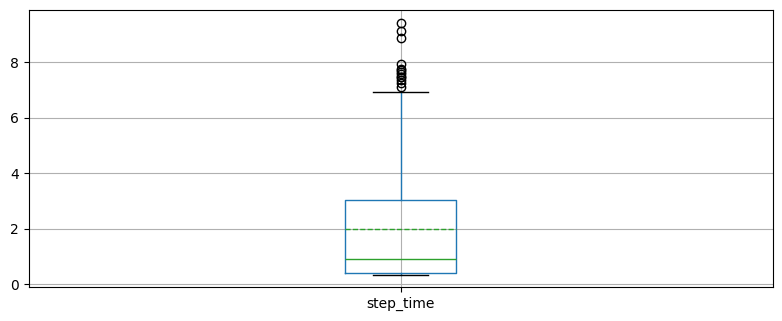

In [288]:
data[ 'step_time' ].to_frame().boxplot( meanline = True, showmeans = True )